<a href="https://colab.research.google.com/github/TasnimJumara/TableAssignmentFirst/blob/master/Experiment2_b(2ndDataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
import pandas as pd

In [ ]:
import os
from skimage import io


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size=100
num_iteration=8000
input_dimension=28*28
num_hiddennodes=28*28
output_dimension=10
learning_rate=.01
hidden_layers=3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:

train_dataset = (r "/content/drive/MyDrive/Assignment/Dataset_2/verification_train.csv" train=True, transform=transforms.ToTensor())

test_dataset = (r "/content/drive/MyDrive/Assignment/Dataset_2/verification_test.csv" train=True, transform=transforms.ToTensor())


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hiddennodes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, num_hiddennodes)
        self.elu_1 = nn.ELU()

        self.linear_2 = nn.Linear(num_hiddennodes, num_hiddennodes)
        self.sigmoid_1 = nn.Sigmoid()
  
        #self.linear_3 = nn.Linear(num_hiddennodes, num_hiddennodes)
        #self.softsign_1 = nn.Softsign()

        self.linear_out = nn.Linear(num_hiddennodes, num_classes)

    def forward(self, x):
       
        out = self.linear_1(x)
        out = self.elu_1(out)
        
        out  = self.linear_2(out)
        out = self.sigmoid_1(out)

        #out  = self.linear_3(out)
       # out = self.softsign_1(out)

        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dimension,
                               num_classes = output_dimension,
                               num_hiddennodes = num_hiddennodes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 400 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)


                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

[2.2557425498962402, 2.201486587524414, 2.001041889190674, 1.5735911130905151, 1.3746927976608276, 1.098446249961853, 0.9256823062896729, 0.8043768405914307, 0.8209253549575806, 0.7929643392562866, 0.54505854845047, 0.5672382116317749, 0.5939651727676392, 0.5290084481239319, 0.435552179813385, 0.40829238295555115, 0.40649688243865967, 0.4525517225265503, 0.4058442711830139]


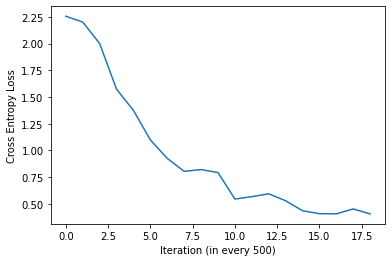

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()